In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pickle
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Install required packages (uncomment if needed)
# !pip install openpyxl scikit-learn matplotlib seaborn

# Load dataset
df = pd.read_csv("liver_cirrhosis_diet_dataset.csv")
print("Data loaded successfully. First 5 rows:")
display(df.head())

Data loaded successfully. First 5 rows:


,Patient ID,Age,Sex,Simplified Cirrhosis Stage,Food Suggestion 1,Food Suggestion 2,Food Suggestion 3,Dietary Focus,Sodium Consideration,Protein Consideration,Fluid Consideration,Digestibility,Cost Effectiveness
0,1,43,Male,Early,Oats Idli with Tomato Chutney,Poha with Vegetables,Whole Wheat Chapati with Curry,Balanced Nutrition,Monitor,Adequate,Normal,Very Easy,Low
1,2,73,Female,Advanced,Sago Kanji,Steamed Apple Slices,Clear Veg Soup,"Very Low Sodium, Managed Protein",Very Strict,Managed,May be Restricted,Easy,Low
2,3,71,Male,Advanced,Coconut Water (if allowed),Stewed Pear,Thin Moong Dal Soup,"Very Low Sodium, Managed Protein",Very Strict,Managed,May be Restricted,Very Easy,Low
3,4,73,Male,Progressive,Upma with Carrot Beans,Multi-Grain Dosa,Thakkali Rasam with Rice,"Low Sodium, Adequate Protein",Strict,Adequate,Normal,Very Easy,Very Low
4,5,65,Male,Early,Oats Idli with Tomato Chutney,Poha with Vegetables,Whole Wheat Chapati with Curry,Balanced Nutrition,Monitor,Adequate,Normal,Very Easy,Very Low


In [4]:
# Mapping categorical to numerical
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})
df['Simplified Cirrhosis Stage'] = df['Simplified Cirrhosis Stage'].map({
    'Early': 1, 'Progressive': 2, 'Advanced': 3
})

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Feature set
features = ['Age', 'Sex', 'Simplified Cirrhosis Stage']
X = df[features]

# Encode food suggestions
le_bf = LabelEncoder()
le_ln = LabelEncoder()
le_dn = LabelEncoder()

y_bf = le_bf.fit_transform(df['Food Suggestion 1'])  # Breakfast
y_ln = le_ln.fit_transform(df['Food Suggestion 2'])  # Lunch
y_dn = le_dn.fit_transform(df['Food Suggestion 3'])  # Dinner

print("\nLabel encoding completed for meal suggestions.")


Missing values per column:
Patient ID                    0
Age                           0
Sex                           0
Simplified Cirrhosis Stage    0
Food Suggestion 1             0
Food Suggestion 2             0
Food Suggestion 3             0
Dietary Focus                 0
Sodium Consideration          0
Protein Consideration         0
Fluid Consideration           0
Digestibility                 0
Cost Effectiveness            0
dtype: int64

Label encoding completed for meal suggestions.


In [5]:
# Split data into train and test sets
X_train, X_test, y_bf_train, y_bf_test = train_test_split(X, y_bf, test_size=0.2, random_state=42)
_, _, y_ln_train, y_ln_test = train_test_split(X, y_ln, test_size=0.2, random_state=42)
_, _, y_dn_train, y_dn_test = train_test_split(X, y_dn, test_size=0.2, random_state=42)

# Train models
model_bf = RandomForestClassifier(random_state=42)
model_ln = RandomForestClassifier(random_state=42)
model_dn = RandomForestClassifier(random_state=42)

print("Training models...")
model_bf.fit(X_train, y_bf_train)
model_ln.fit(X_train, y_ln_train)
model_dn.fit(X_train, y_dn_train)
print("Model training completed.")

Training models...
Model training completed.



Breakfast Model Performance:
                                   precision    recall  f1-score   support

                  Adai with Avial       0.25      0.18      0.21        17
                     Barley Water       0.15      0.17      0.16        12
       Coconut Water (if allowed)       0.20      0.29      0.24        14
Idli (2) with Sambar (low sodium)       0.00      0.00      0.00         7
                   Idli with Stew       0.14      0.15      0.15        13
          Millet Dosa with Sambar       0.32      0.50      0.39        12
    Oats Idli with Tomato Chutney       0.00      0.00      0.00        17
 Ragi Dosa with Vegetable Filling       0.27      0.23      0.25        13
   Rava Upma with Coconut Chutney       0.21      0.25      0.23        12
      Rice Idli with Mint Chutney       0.08      0.09      0.09        11
                       Rice Kanji       0.20      0.14      0.17        14
                       Sago Kanji       0.56      0.31      0.40     

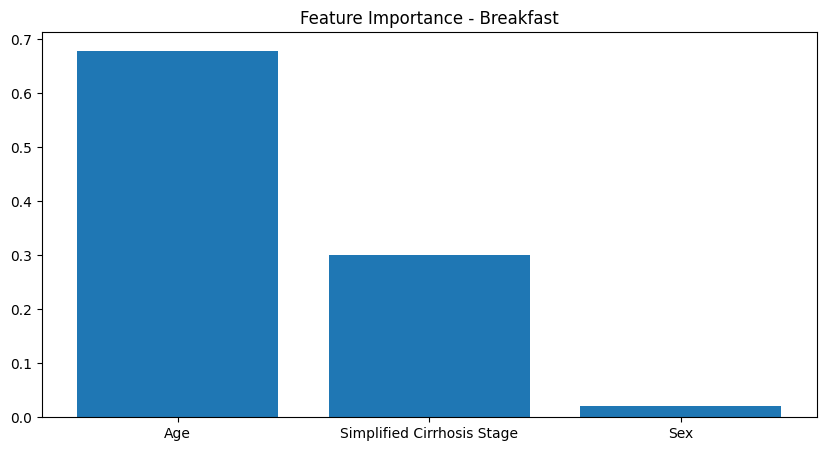


Lunch Model Performance:
                           precision    recall  f1-score   support

              Apple Puree       0.15      0.17      0.16        12
          Barley Porridge       0.32      0.50      0.39        12
Besan Cheela with Veggies       0.21      0.25      0.23        12
      Diluted Grape Juice       0.35      0.46      0.40        13
Khichdi with Low Fat Curd       0.27      0.23      0.25        13
         Multi-Grain Dosa       0.36      0.33      0.35        12
     Poha with Vegetables       0.00      0.00      0.00        17
   Rice & Lentil Porridge       0.25      0.18      0.21        17
              Semiya Upma       0.08      0.09      0.09        11
     Steamed Apple Slices       0.56      0.31      0.40        16
              Stewed Pear       0.20      0.29      0.24        14
          Vegetable Broth       0.20      0.14      0.17        14
          Vegetable Pulao       0.14      0.15      0.15        13
           Vegetable Upma       0.0

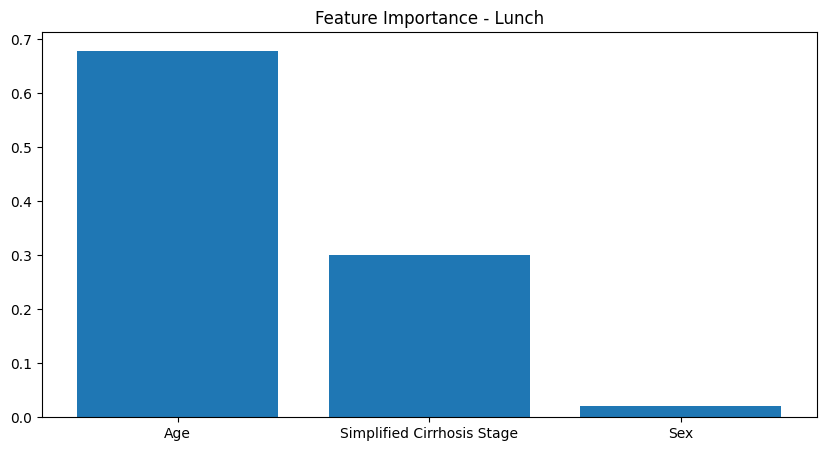


Dinner Model Performance:
                                precision    recall  f1-score   support

     Brown Rice with Moong Dal       0.00      0.00      0.00         7
      Chapati with Spinach Dal       0.08      0.09      0.09        11
                Clear Veg Soup       0.56      0.31      0.40        16
                     Curd Rice       0.32      0.50      0.39        12
                 Mashed Banana       0.20      0.14      0.17        14
                    Rice Gruel       0.35      0.46      0.40        13
        Rice with Lentil Curry       0.26      0.29      0.28        17
         Soft Chapati with Dal       0.14      0.15      0.15        13
      Thakkali Rasam with Rice       0.36      0.33      0.35        12
           Thin Moong Dal Soup       0.20      0.29      0.24        14
                Vegetable Dosa       0.25      0.18      0.21        17
             Vegetable Poriyal       0.27      0.23      0.25        13
    Vegetable Sambar with Rice      

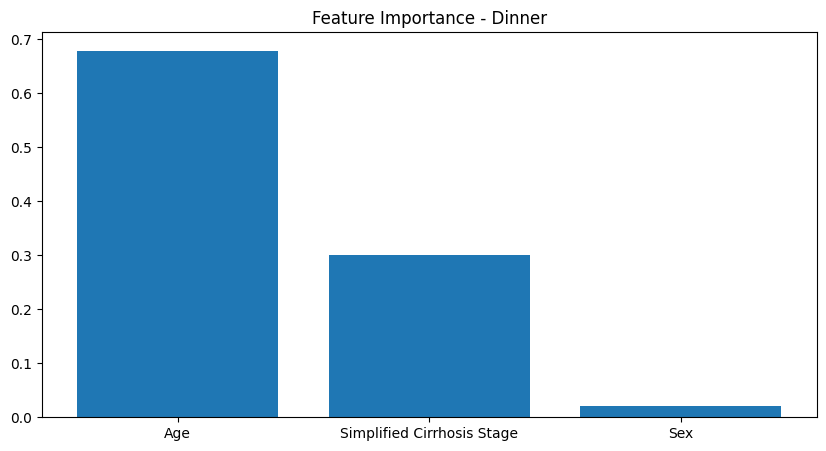

In [6]:
def evaluate_model(model, X_test, y_test, encoder, meal_type):
    y_pred = model.predict(X_test)
    y_test_labels = encoder.inverse_transform(y_test)
    y_pred_labels = encoder.inverse_transform(y_pred)
    
    print(f"\n{meal_type} Model Performance:")
    print(classification_report(y_test_labels, y_pred_labels, zero_division=0))
    
    # Plot feature importance
    plt.figure(figsize=(10, 5))
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.title(f"Feature Importance - {meal_type}")
    plt.bar(range(len(features)), importances[indices], align="center")
    plt.xticks(range(len(features)), [features[i] for i in indices])
    plt.show()

# Evaluate each model
evaluate_model(model_bf, X_test, y_bf_test, le_bf, "Breakfast")
evaluate_model(model_ln, X_test, y_ln_test, le_ln, "Lunch")
evaluate_model(model_dn, X_test, y_dn_test, le_dn, "Dinner")

In [7]:
def generate_meal_plan(age, sex_str, stage_str, days=30):
    sex = 1 if sex_str == 'Male' else 0
    stage_map = {'Early': 1, 'Progressive': 2, 'Advanced': 3}
    stage = stage_map[stage_str]
    
    X_new = pd.DataFrame([[age, sex, stage]], columns=features)

    def top3_random_choice(model, encoder):
        probs = model.predict_proba(X_new)[0]
        top3_indices = np.argsort(probs)[-3:]
        chosen = np.random.choice(top3_indices)
        return encoder.inverse_transform([chosen])[0]

    plan = []
    for day in range(1, days + 1):
        breakfast = top3_random_choice(model_bf, le_bf)
        lunch = top3_random_choice(model_ln, le_ln)
        dinner = top3_random_choice(model_dn, le_dn)
        plan.append({
            "Day": f"Day {day}",
            "Breakfast": breakfast,
            "Lunch": lunch,
            "Dinner": dinner
        })

    return pd.DataFrame(plan)

# Example usage
print("\nGenerating example meal plan...")
example_plan = generate_meal_plan(age=65, sex_str='Male', stage_str='Advanced')
display(example_plan.head())


Generating example meal plan...


,Day,Breakfast,Lunch,Dinner
0,Day 1,Thin Khichdi,Diluted Grape Juice,Vegetable Stock
1,Day 2,Barley Water,Apple Puree,Clear Veg Soup
2,Day 3,Barley Water,Diluted Grape Juice,Vegetable Stock
3,Day 4,Sago Kanji,Steamed Apple Slices,Vegetable Stock
4,Day 5,Barley Water,Apple Puree,Vegetable Stock


In [8]:
# Save models and encoders
with open('models/breakfast_model.pkl', 'wb') as f:
    pickle.dump(model_bf, f)
with open('models/lunch_model.pkl', 'wb') as f:
    pickle.dump(model_ln, f)
with open('models/dinner_model.pkl', 'wb') as f:
    pickle.dump(model_dn, f)

with open('models/breakfast_encoder.pkl', 'wb') as f:
    pickle.dump(le_bf, f)
with open('models/lunch_encoder.pkl', 'wb') as f:
    pickle.dump(le_ln, f)
with open('models/dinner_encoder.pkl', 'wb') as f:
    pickle.dump(le_dn, f)

print("\nModels and encoders saved successfully in 'models/' directory.")


Models and encoders saved successfully in 'models/' directory.


In [10]:
# Save example plan to Excel
try:
    example_plan.to_excel("30_day_meal_plan.xlsx", index=False)
    print("\nMeal plan saved to '30_day_meal_plan.xlsx'")
except Exception as e:
    print(f"\nError saving to Excel: {e}")
    print("Please install openpyxl: pip install openpyxl")


Meal plan saved to '30_day_meal_plan.xlsx'


In [11]:
# Example of how to load models in API
def load_models():
    with open('models/breakfast_model.pkl', 'rb') as f:
        bf_model = pickle.load(f)
    with open('models/lunch_model.pkl', 'rb') as f:
        ln_model = pickle.load(f)
    with open('models/dinner_model.pkl', 'rb') as f:
        dn_model = pickle.load(f)
    
    with open('models/breakfast_encoder.pkl', 'rb') as f:
        bf_encoder = pickle.load(f)
    with open('models/lunch_encoder.pkl', 'rb') as f:
        ln_encoder = pickle.load(f)
    with open('models/dinner_encoder.pkl', 'rb') as f:
        dn_encoder = pickle.load(f)
    
    return bf_model, ln_model, dn_model, bf_encoder, ln_encoder, dn_encoder

print("\nModel loading function ready for API implementation.")


Model loading function ready for API implementation.
